In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

HRM1017 analogread analysis


In [2]:
si=75.8
print("sampling interval for N=1024*1024: ", si)
freq=1/(si/1024/1024)
print("sampling frequency : ", freq, "Hz")

sampling interval for N=1024*1024:  75.8
sampling frequency :  13833.456464379948 Hz


In [4]:
data=np.loadtxt('hrm1017_3.dat', delimiter=',')
#plt.plot(data)

In [5]:
def funcM(x,t):
    ret=sum(x[0:N2])+sum(x[t:N2+t])
    return ret

1.50420379639
[  1.00000000e+00   9.45284095e-01   7.94501779e-01   5.80994750e-01
   3.49742452e-01   1.42998938e-01  -1.51049523e-02  -1.22978409e-01
  -1.93183072e-01  -2.41732807e-01  -2.82039066e-01  -3.20985658e-01
  -3.56644208e-01  -3.77743032e-01  -3.67103203e-01  -3.09248064e-01
  -2.00679916e-01  -5.71026377e-02   8.69853650e-02   1.89698151e-01
   2.20976133e-01   1.74641640e-01   6.84600268e-02  -6.51132208e-02
  -1.90405728e-01  -2.81249636e-01  -3.28191013e-01  -3.36508344e-01
  -3.19553020e-01  -2.90400879e-01  -2.57885378e-01  -2.21751085e-01
  -1.72910869e-01  -9.90005640e-02   1.27035296e-02   1.66877612e-01
   3.55049522e-01   5.51137807e-01   7.16860809e-01   8.15129520e-01
   8.24633311e-01   7.45415776e-01   5.95793463e-01   4.07803829e-01
   2.19905674e-01   6.31721209e-02  -4.97315772e-02  -1.23412494e-01
  -1.70372355e-01  -2.03650330e-01  -2.32797639e-01  -2.60842561e-01
  -2.84184643e-01  -2.92391979e-01  -2.71181369e-01  -2.10383860e-01
  -1.11607847e-01   

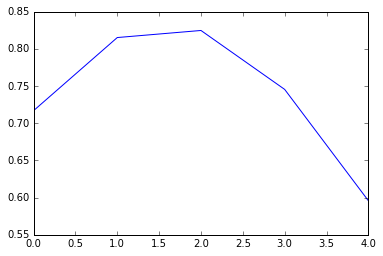

In [11]:
N=256
N2=128
x=data
x=(x-512)/512
x[N2:N] = np.zeros(N2)
#plt.plot(x)

# smarter way paper
F=np.fft.fft(x)
#plt.plot(np.real(F))
ps=np.real(F*np.conjugate(F))
#plt.plot(ps)
r=np.real(np.fft.ifft(ps))
x2=x*x
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
#plt.plot(m)
print(m[0])
r=r[0:N2]
nsdf=2*r/m
plt.plot(nsdf[38:43])
#print(nsdf)

-- fft --
[ 0.00882721+0.j         -0.00130075-0.00416445j  0.00215763+0.00016697j
 -0.00274582-0.00095658j  0.00255318+0.00232301j -0.00521182+0.00023977j
  0.00474593+0.01419831j  0.01406422-0.00225287j  0.00278208-0.00429883j
  0.00336865-0.00061411j]
-- ps --
[  3.89598135e-05   9.51728598e-06   2.34163002e-06   4.22727085e-06
   5.95753236e-06   1.36102712e-05   1.12057957e-04   1.01438857e-04
   1.31099744e-05   5.86248613e-06]
-- ifft --
[ -3.25232744e-04 -9.37983110e-19j  -2.78204679e-04 -9.08442836e-19j
  -2.16186047e-04 +4.06575815e-20j  -1.23582780e-04 +5.84607147e-21j
   1.58548355e-05 +1.62086797e-19j   2.08258629e-04 +5.46770508e-19j
   4.42832708e-04 +4.98793006e-19j   6.87055290e-04 +9.20276363e-19j
   8.93644989e-04 +1.50563914e-18j   1.01493299e-03 +2.06763283e-18j]
-- m --
[ 0.0058758   0.00582393  0.00574233  0.00565398  0.00558907  0.00555474
  0.0055422   0.00553839  0.0055369   0.00553666]
max r= 0.00146894901991 , max m= 0.00587579607964


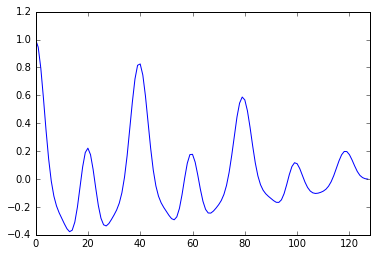

In [12]:

# overflow considering
F=np.fft.fft(x)/N             #avoid overflow here
print("-- fft --")
print(F[0:10])
ps=np.real(F*np.conjugate(F)/2)  #avoid overflow here
print("-- ps --")
print(ps[0:10])
#plt.plot(ps[30:40])
ifftps=np.fft.ifft(ps)*N           #avoid overflow here(not *1024)
print("-- ifft --")
print(ifftps[30:40])
r=np.real(ifftps)
#plt.plot(r)
x2=x*x/N                       #avoid overflow
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
print("-- ms --")
print(m[0:10])
#plt.plot(m)
r=r[0:N2]
print("max r=", np.max(r), ", max m=", np.max(m))
nsdf=2*2*r/(m)                #avoid overflow here
plt.plot(nsdf)
plt.xlim([0,N2])
plt.show()

In [13]:
t1=(16*60 + 52.636)-(15*60 + 31.760)
t2=(18*60 + 33.641)-(17*60 + 13.215)
t3=(20*60 + 16.043)-(18*60 + 55.136)

ts=np.array([t1, t2, t3])
print(ts)
tavg=np.average(ts)
T=tavg

print("1024*1024 sampling took T=",T, "sec")
freq=1/(T)
print("freq per sample=", freq)

ns=np.arange(128)
freqs=1/(ns*T/1024/1024)
#print(freqs)
k=np.log10(2**(1/12))
midinotes=np.round(np.log10(freqs/27.5)/k)+21
# array to use in program
print(midinotes)
print(midinotes[40])

[ 80.876  80.426  80.907]
1024*1024 sampling took T= 80.7363333333 sec
freq per sample= 0.0123859972173
[  inf  128.  116.  109.  104.  100.   97.   94.   92.   90.   88.   86.
   85.   83.   82.   81.   80.   79.   78.   77.   76.   75.   74.   73.
   73.   72.   71.   71.   70.   69.   69.   68.   68.   67.   67.   66.
   66.   65.   65.   64.   64.   63.   63.   62.   62.   62.   61.   61.
   61.   60.   60.   60.   59.   59.   59.   58.   58.   58.   57.   57.
   57.   56.   56.   56.   56.   55.   55.   55.   55.   54.   54.   54.
   54.   53.   53.   53.   53.   52.   52.   52.   52.   52.   51.   51.
   51.   51.   50.   50.   50.   50.   50.   50.   49.   49.   49.   49.
   49.   48.   48.   48.   48.   48.   48.   47.   47.   47.   47.   47.
   47.   46.   46.   46.   46.   46.   46.   45.   45.   45.   45.   45.
   45.   45.   44.   44.   44.   44.   44.   44.]
64.0
